<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week4/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
?imdb.load_data

Object `imdb.load_data` not found.


In [107]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
#num_words
#등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지
#10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용
#단어 집합의 크기는 10,000

#토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태
#IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여

In [108]:
train_data.shape

(25000,)

In [109]:
train_data[0][:20]
#실제 순위에서 +3 된 정수들임
#(맵핑된 수 - 3)은 몇번째로 많이 반복된 단어인가를 나타냄
#IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있음. 그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25]

In [111]:
len(train_data[0])

218

In [112]:
train_labels[0]
#positive 1
#negative 0

1

In [113]:
[ 3*i if (i*3 > 5) else 0 for i in range(3)]

[0, 0, 6]

In [114]:
[ 3*i for i in range(3) if (i*3 > 5)]

[6]

In [115]:
max([max(sequence) for sequence in train_data])
#num_words 를 10000으로 했기 때문

9999

**Decoding reviews back to text**

In [116]:
#실제 순위
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#items() 사용해서 딕셔너리에 있는 키와 값들의 쌍을 얻기

#get(x) 함수는 x라는 Key에 대응되는 Value를 리턴
#딕셔너리 안에 찾으려는 Key가 없을 경우 미리 정해 둔 디폴트 값을 대신 가져오게 함 -> "?""

#'구분자'.join(list)를 이용하면 list의 값과 값 사이에 '구분자'에 들어온 구분자를 넣어서 하나의 문자열로 합쳐줌

In [117]:
from itertools import islice
#딕셔너리 일부만 출력하려고

In [118]:
dict(islice(imdb.get_word_index().items(), 20))
# imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있음 -> 실제로 각각의 수는 몇번째로 많이 반복된 단어인가를 나타냄
# imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수임. 이건 그냥 IMDB 리뷰 데이터셋에서 정한 규칙

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013}

In [119]:
imdb.get_word_index().get('the')

1

In [120]:
dict(islice(reverse_word_index.items(), 20))
#key와 value를 바꿈

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's"}

In [121]:
train_data[0][:3]
#실제 순위는 -2,11,19

[1, 14, 22]

In [122]:
reverse_word_index.get(1 - 3, "?")

'?'

In [123]:
reverse_word_index.get(14 - 3, "?")

'this'

In [124]:
reverse_word_index.get(22 - 3, "?")

'film'

In [125]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [126]:
#멀티 핫 인코딩
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [127]:
x_train.shape

(25000, 10000)

In [128]:
x_train[0]
# 맵핑된 정수가 1,14,22면 1번째 14번째 22번째 원소가 1, 나머지는 0

array([0., 1., 1., ..., 0., 0., 0.])

In [129]:
x_train[0][1]

1.0

In [130]:
x_train[0][14]

1.0

In [131]:
x_train[0][22]

1.0

In [132]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [133]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #output 0,1 -> 크기 1
])

**Compiling the model**

In [134]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [135]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [136]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 78ms/step - loss: 0.5170 - accuracy: 0.7686 - val_loss: 0.3983 - val_accuracy: 0.8562
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3221 - accuracy: 0.8915 - val_loss: 0.3392 - val_accuracy: 0.8635
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2419 - accuracy: 0.9186 - val_loss: 0.2897 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1966 - accuracy: 0.9357 - val_loss: 0.2829 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1658 - accuracy: 0.9466 - val_loss: 0.2839 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1404 - accuracy: 0.9550 - val_loss: 0.2882 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1182 - accuracy: 0.9648 - val_loss: 0.3503 - val_accuracy: 0.8660
Epoch 8/20
30

In [137]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

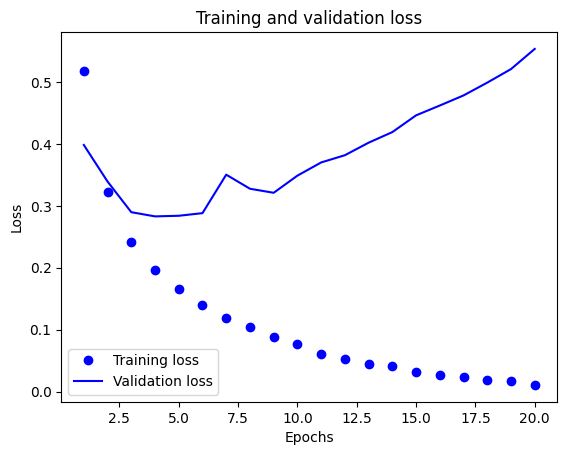

In [138]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

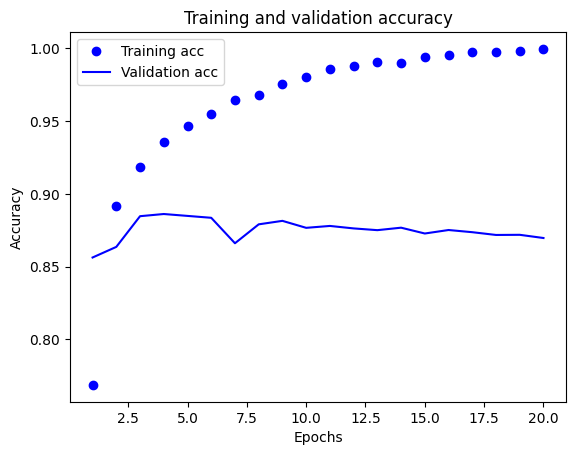

In [139]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

에포크를 4로 설정하는 게 가장 좋아보임

**Retraining a model from scratch**

In [140]:
#에포크 4로 해보기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4721 - accuracy: 0.8084
Epoch 2/4
49/49 [==============================] - 2s 42ms/step - loss: 0.2770 - accuracy: 0.9022
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2140 - accuracy: 0.9230
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3085 - accuracy: 0.8765


In [141]:
results
#test loss, test accuracy

[0.30851536989212036, 0.876479983329773]

### Using a trained model to generate predictions on new data

In [142]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.27700102],
       [0.9995814 ],
       [0.96176267],
       ...,
       [0.13898587],
       [0.1131744 ],
       [0.7826724 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [143]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [144]:
len(train_data)

8982

In [145]:
train_data.shape

(8982,)

In [146]:
len(test_data)

2246

In [147]:
train_data[10]
#실제 순위에서 +3 된 정수들임
#(맵핑된 수 - 3)은 몇번째로 많이 반복된 단어인가를 나타냄
#IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있음. 그래서 정수 4부터가 실제로 빈도수가 가장 높은 영단어

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [148]:
import numpy as np
np.unique(train_labels)
#0-45

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

**Decoding newswires back to text**

In [149]:
#실제 순위  
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [150]:
train_labels[10]

3

In [151]:
train_data[0][4:6]
#실제 순위는 40, 7

[43, 10]

In [152]:
reverse_word_index.get(43 - 3, "?")

'as'

In [153]:
reverse_word_index.get(10 - 3, "?")

'a'

In [154]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [155]:
#멀티 핫 인코딩
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [156]:
x_train.shape

(8982, 10000)

In [157]:
x_test.shape

(2246, 10000)

**Encoding the labels**

In [159]:
#원 핫 인코딩
#46개의 분류 토픽으로 원 핫 인코딩  
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [160]:
from tensorflow.keras.utils import to_categorical
#to_categorical : 원핫벡터로 바꿔주는 함수  
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [161]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #다중분류일 때는 시그모이드 아니라 소프트맥스    
])

**Compiling the model**

In [162]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",  #outcome이 원핫벡터
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [163]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [164]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 83ms/step - loss: 2.6498 - accuracy: 0.4402 - val_loss: 1.7863 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 2s 94ms/step - loss: 1.5147 - accuracy: 0.6804 - val_loss: 1.3453 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 1.1640 - accuracy: 0.7449 - val_loss: 1.1860 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9561 - accuracy: 0.7934 - val_loss: 1.0888 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.7984 - accuracy: 0.8241 - val_loss: 1.0057 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6651 - accuracy: 0.8573 - val_loss: 0.9528 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5631 - accuracy: 0.8775 - val_loss: 0.9351 - val_accuracy: 0.7960
Epoch 8/20
16

**Plotting the training and validation loss**

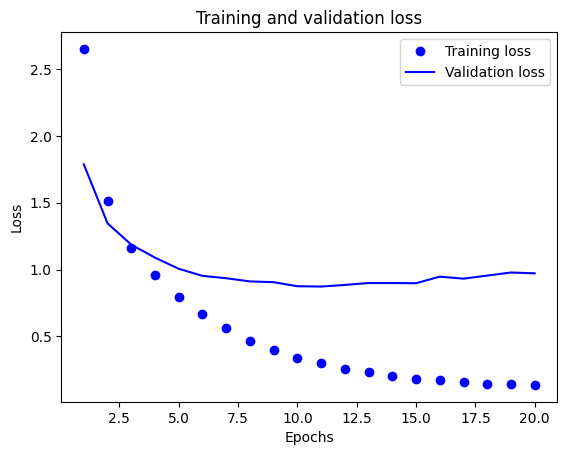

In [165]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

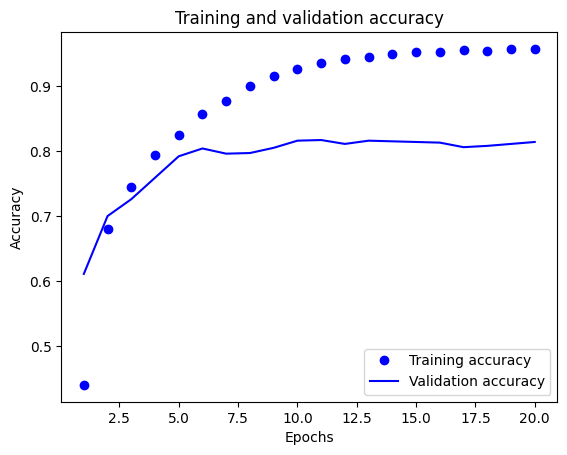

In [166]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [167]:
#에포크 9로 해보기  
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 60ms/step - loss: 2.6613 - accuracy: 0.5163
Epoch 2/9
18/18 [==============================] - 2s 84ms/step - loss: 1.4981 - accuracy: 0.6806
Epoch 3/9
18/18 [==============================] - 1s 69ms/step - loss: 1.1412 - accuracy: 0.7475
Epoch 4/9
18/18 [==============================] - 1s 43ms/step - loss: 0.9201 - accuracy: 0.8044
Epoch 5/9
18/18 [==============================] - 1s 49ms/step - loss: 0.7604 - accuracy: 0.8401
Epoch 6/9
18/18 [==============================] - 1s 49ms/step - loss: 0.6303 - accuracy: 0.8646
Epoch 7/9
18/18 [==============================] - 1s 53ms/step - loss: 0.5255 - accuracy: 0.8897
Epoch 8/9
18/18 [==============================] - 1s 49ms/step - loss: 0.4418 - accuracy: 0.9068
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9176 - accuracy: 0.7930


In [168]:
results

[0.9176416993141174, 0.792965292930603]

accuracy가 79.2% 나왔는데 이게 좋은건가? 잘 모름

In [169]:
import copy
test_labels_copy = copy.copy(test_labels) #test label 셔플  
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1714158504007124

랜덤 레이블과 기존 레이블을 비교했더니 17%의 정확도 보임

이게 높았다면? 랜덤으로 예측해도 정확도가 높다는 뜻이니까 78,8%의 정확도가 좋은 거라고 보기 어렵다

하지만 17%로 낮기 때문에 78.8의 정확도는 꽤괜

### Generating predictions on new data

In [170]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [171]:
predictions[0].shape

(46,)

In [172]:
np.sum(predictions[0])

0.99999994

In [173]:
np.argmax(predictions[0])

3

In [176]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [175]:
np.argmax(y_test[0])

3

### A different way to handle the labels and the loss

In [177]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
#원핫인코딩 안하고 그냥하기
#이렇게 할 거면 0~45 값이어야함 

In [182]:
y_test[:100]

array([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3,  5,  4,  1,  3,  1, 11, 23,
        3, 19,  3,  8,  3,  3,  3,  9,  3,  4,  6, 10,  3,  3, 10, 20,  1,
       19,  4, 40,  1,  4,  3, 15, 21,  3, 34,  4,  4,  3,  4,  3, 11, 20,
        3,  1,  3,  3,  4, 26,  4, 20, 19,  4,  3,  4,  4,  4,  3,  3,  1,
        3,  4, 21, 16,  3, 19, 43,  2,  1,  3, 39,  4,  3,  3,  3, 11, 19,
       20,  1, 11,  4,  3,  3,  4,  3,  4,  3, 11, 11,  3, 20, 28])

In [184]:
np.min(y_test)

0

In [185]:
np.max(y_test)

45

In [186]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#loss가 categoricla_crossentropy에서 sparse_categorical_crossentropy로 변경
#sparse_categorical_crossentropy는 레이블이 정수형태일 때 사용

model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=128)


Epoch 1/20
71/71 [==============================] - 2s 19ms/step - loss: 1.7895 - accuracy: 0.6285
Epoch 2/20
71/71 [==============================] - 1s 17ms/step - loss: 0.9692 - accuracy: 0.7891
Epoch 3/20
71/71 [==============================] - 2s 23ms/step - loss: 0.6601 - accuracy: 0.8631
Epoch 4/20
71/71 [==============================] - 2s 26ms/step - loss: 0.4628 - accuracy: 0.9030
Epoch 5/20
71/71 [==============================] - 1s 17ms/step - loss: 0.3413 - accuracy: 0.9271
Epoch 6/20
71/71 [==============================] - 1s 18ms/step - loss: 0.2688 - accuracy: 0.9395
Epoch 7/20
71/71 [==============================] - 1s 19ms/step - loss: 0.2285 - accuracy: 0.9447
Epoch 8/20
71/71 [==============================] - 1s 18ms/step - loss: 0.2005 - accuracy: 0.9483
Epoch 9/20
71/71 [==============================] - 2s 35ms/step - loss: 0.1782 - accuracy: 0.9520
Epoch 10/20
71/71 [==============================] - 1s 19ms/step - loss: 0.1670 - accuracy: 0.9513
Epoch 11/

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [179]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),     #64->4로 바꿈
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.8002 - accuracy: 0.2439 - val_loss: 2.1049 - val_accuracy: 0.5450
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.7454 - accuracy: 0.6263 - val_loss: 1.5551 - val_accuracy: 0.6460
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.3559 - accuracy: 0.6709 - val_loss: 1.3955 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1863 - accuracy: 0.6963 - val_loss: 1.3310 - val_accuracy: 0.6750
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0753 - accuracy: 0.7197 - val_loss: 1.2908 - val_accuracy: 0.6920
Epoch 6/20
63/63 [==============================] - 2s 30ms/step - loss: 0.9833 - accuracy: 0.7476 - val_loss: 1.2853 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9061 - accuracy: 0.7633 - val_loss: 1.2625 - val_accuracy: 0.6970
Epoch 8/20
63

###val_acc가 81%에서 72%로 하락

###: layer 크기의 중요성


### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [187]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [188]:
train_data.shape

(404, 13)

In [189]:
test_data.shape

(102, 13)

In [191]:
train_targets.shape

(404,)

In [192]:
test_targets.shape

(102,)

### Preparing the data

**Normalizing the data**

In [193]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

정규화하면 더 빠르게 수렴함

### Building your model

**Model definition**

In [195]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"), 
        layers.Dense(1)                                                         #regression에서는 활성화함수 없음. 결과값이 -무한대~+무한대여야 하니까      
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])             #loss : mse
    return model

### Validating your approach using K-fold validation

data가 적어서

**K-fold validation**

In [196]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [197]:
all_scores

[2.079167366027832, 2.3236703872680664, 2.6181766986846924, 2.3464231491088867]

In [198]:
np.mean(all_scores)

2.3418594002723694

**Saving the validation logs at each fold**

In [199]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [209]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [212]:
len(mae_history)

500

In [207]:
len(all_mae_histories)
#mae_history가 4개 있음. k= 1,2,3,4 

4

In [214]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [216]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# i : 0~500
# i = 0 : 첫 에포크일 때 k=1,2,3,4 일 때의 mae의 평균

In [217]:
len(average_mae_history)

500

**Plotting validation scores**

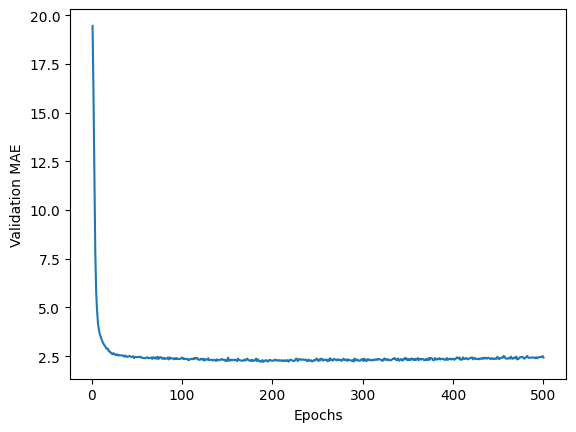

In [201]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

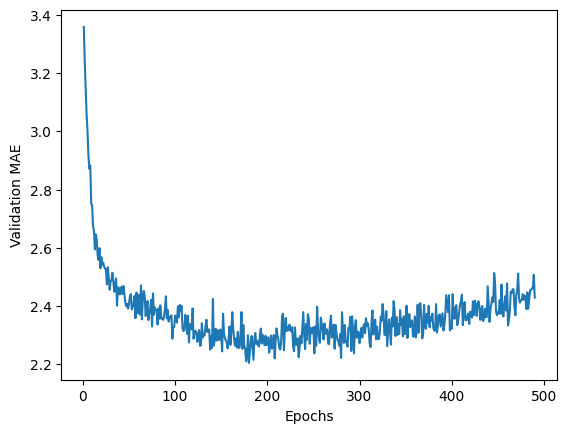

In [202]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [203]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.3732 - mae: 2.6377


In [204]:
test_mae_score

2.6377437114715576

### Generating predictions on new data

In [205]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([7.545502], dtype=float32)

### Wrapping up

## Summary